# Statistics and Probability

<p style="float:right;">
<span>By- Darpan Kattel <a href="https://darpankattel.com.np/" target="_blank">(Website)</a></span>
<br />
    <span>PUL077BCT<b>099</b></span>
</p>

## Prepairing a dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Seeding the random values so that random values are repeated and hence the list is same on every run

In [2]:
np.random.seed(42)

In [3]:
data = {
    "Age": np.random.normal(loc=30, scale=10, size=1000),
    "Income": np.random.normal(loc=50000, scale=15000, size=1000),
    "SpendingScore": np.random.randint(1, 100, size=1000)
}
df = pd.DataFrame(data)
df.head()

,Age,Income,SpendingScore
0,34.967142,70990.331549,30
1,28.617357,63869.505244,95
2,36.476885,50894.455549,75
3,45.230299,40295.948334,99
4,27.658466,60473.349704,72


## Gather information from the data

In [4]:
df.shape

(1000, 3)

In [5]:
df.columns

Index(['Age', 'Income', 'SpendingScore'], dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Age            1000 non-null   float64
 1   Income         1000 non-null   float64
 2   SpendingScore  1000 non-null   int32  
dtypes: float64(2), int32(1)
memory usage: 19.7 KB


In [7]:
df.describe()

,Age,Income,SpendingScore
count,1000.000000,1000.000000,1000.000000
mean,30.193321,51062.543559,50.465000
std,9.792159,14961.815658,28.144678
min,-2.412673,5894.170480,1.000000
25%,23.524097,40906.374665,26.000000
50%,30.253006,50946.156985,51.500000
75%,36.479439,60933.232655,75.000000
max,68.527315,97896.613518,99.000000


### Mean, Median and mode

In [8]:
mean_age = df['Age'].mean()
print(f"Mean Age: {mean_age}")

Mean Age: 30.193320558223256


This is what we gave to the `loc` parameter in the `np.random.normal` function.

In [9]:
median_age = df['Age'].median()
print(f"Median Age: {median_age}")

Median Age: 30.253006122348882


Sice, the mean and the median are almost same, the data can be considered as in normal distribution. Which, obviously it is.

In [10]:
mode_spending = df['SpendingScore'].mode()[0]
print(f"Mode Spending Score: {mode_spending}")

Mode Spending Score: 28


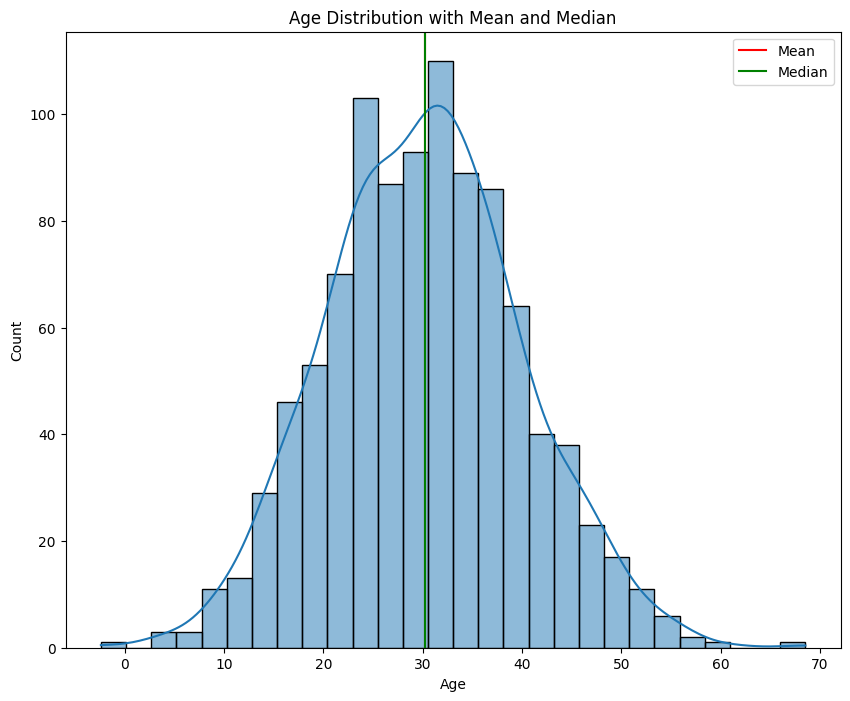

In [11]:
plt.figure(figsize=(10, 8))
sns.histplot(df["Age"], kde=True)
plt.axvline(mean_age, color='r', label="Mean")
plt.axvline(median_age, color='g', label="Median")
plt.legend()
plt.title("Age Distribution with Mean and Median")
plt.show()

**Conclusion: The Kernel Density Estimation (KDE) clearly shows that the curve is of Normal Distribution, as well, the mean and the median line almost at the exam place, which confirms it.**

**KDE:** A statistical technique used to estimate the Probability Density Function (PDF) of a continuous random variable. It provides a smoothed representation of the underlying distribution of the data, often used for data visualization and analysis.

The mode of the above data is a bit skewed.

In [12]:
df["Age"].astype(int).mode()

0    24
Name: Age, dtype: int32

We had to use the method `astype()` with arg `int`, as the age is in float, and hence with float ages, all ages that are unique would appear as a mode.

## Range, Variance, Standard Deviation

### Range

In [13]:
range_income = df["Income"].max() - df["Income"].min()
print(f"Range of Income: {range_income}")

Range of Income: 92002.44303763712


### Variance

In [14]:
variance_income = df["Income"].var()
print(f"Variance of Income: {variance_income}")

Variance of Income: 223855927.79628196


### Standard Deviation

In [15]:
std_income = df["Income"].std()
print(f"Standard Deviation of Income: {std_income}")

Standard Deviation of Income: 14961.815658411313


Here, the `std` is approx. 15,000. We know, 1σ covers **68%** area in the PDF curve, whereas 2σ covers **95%** and 3σ covers **99.7%** of the area.

Here, σ= 15,000 means that there are almost 68% employess that have income 15,000 or less.

2σ = 30,000 means that there are almost 95% employess that have income 30,000 or less.

3σ = 45,000 means that there are almost 99.7% employess that have income 45,000 or less.

Here, had it been completely a normal distribution, then the above numbers would have been absolutely true.

*The below figure explains the above information in more detail.*

![Empirical Rule of Normal Distribution](empirical-rule.png)

## Normal Distribution and Standard Deviation

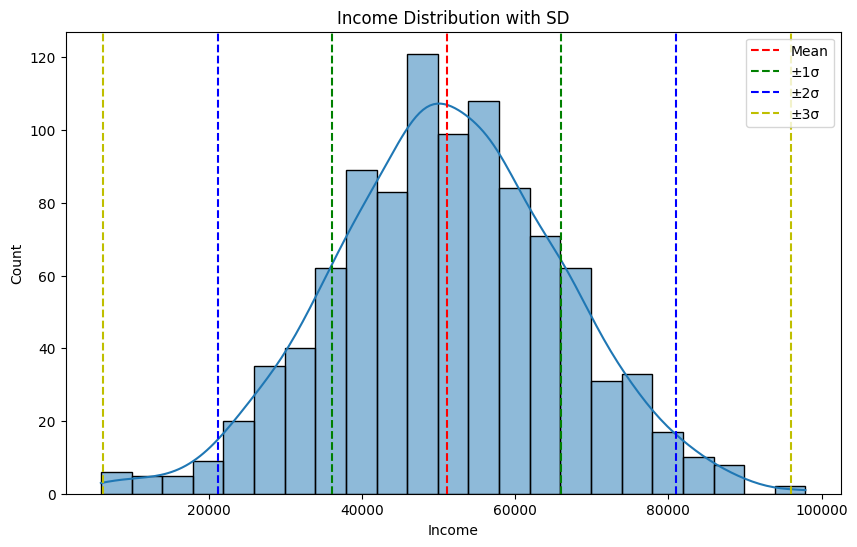

In [24]:
plt.figure(figsize=(10, 6))
sns.histplot(df["Income"], kde=True)

# let's add some vertical lines
# a line to plot the mean value
plt.axvline(df["Income"].mean(), color="r", linestyle="--", label="Mean")

# line for ±1σ
plt.axvline(df["Income"].mean() + df["Income"].std(), color="g", linestyle="--", label="±1σ")
plt.axvline(df["Income"].mean() - df["Income"].std(), color="g", linestyle="--")

# line for ±2σ
plt.axvline(df["Income"].mean() + 2 * df["Income"].std(), color="b", linestyle="--", label="±2σ")
plt.axvline(df["Income"].mean() - 2 * df["Income"].std(), color="b", linestyle="--")


# line for ±3σ
plt.axvline(df["Income"].mean() + 3 * df["Income"].std(), color="y", linestyle="--", label="±3σ")
plt.axvline(df["Income"].mean() - 3 * df["Income"].std(), color="y", linestyle="--")

plt.title("Income Distribution with SD")
plt.legend()
plt.show()

## Z-score

Mathematically, `z-score = ( x - mean ) / std`

In [26]:
df['IncomeZScore'] = (df["Income"] - df["Income"].mean()) / df["Income"].std()
df["IncomeZScore"]

0      1.331910
1      0.855976
2     -0.011234
3     -0.719605
4      0.628988
         ...   
995    1.001864
996   -0.097606
997   -0.955142
998   -0.234500
999   -0.817821
Name: IncomeZScore, Length: 1000, dtype: float64

Since 3σ covers almost 99.7% of data, hence any row with z-score greater than 3σ can be called as outliers, and hence neglected. This is **z-score approach of outlier detection**.

In [28]:
df = df[df["IncomeZScore"] <= 3 * df["Income"].std()]
df

,Age,Income,SpendingScore,IncomeZScore
0,34.967142,70990.331549,30,1.331910
1,28.617357,63869.505244,95,0.855976
2,36.476885,50894.455549,75,-0.011234
3,45.230299,40295.948334,99,-0.719605
4,27.658466,60473.349704,72,0.628988
...,...,...,...,...
995,27.188997,66052.253575,25,1.001864
996,47.976865,49602.181111,55,-0.097606
997,36.408429,36771.880232,46,-0.955142
998,24.288210,47553.995541,32,-0.234500


Since, no row is removed, hence there were no outliers.

#### Why do we need to remove outliers?

Because outliers can create biasness. They are those data objects that are different than others and if they are taken into consideration, then they could ruin the process of AI/ML.

**Practical Example**: In a dataset of house prices, a few extremely high-priced mansions can skew the mean price upwards, giving a false impression of the typical house price in the area. Removing these outliers helps provide a more accurate representation of the central tendency and variability of the typical house prices.

## Interquartile Range (IQR)

Mathematically, `IQR = Q3 - Q1`

In [30]:
Q1 = df["Income"].quantile(0.25)
print(f"Q1 = {Q1}")
Q3 = df["Income"].quantile(0.75)
print(f"Q3 = {Q3}")
IQR = Q3 - Q1
IQR

Q1 = 40906.374664608324
Q3 = 60933.23265547444


20026.85799086612

We know that, Q1 is 25 percentile, Q2 is 50 percentile where as Q3 is 75 percentile. Like percentages, percentile can be any number.

The meaning of 25 percentile in the above example is that, there are 25% of people on the list that have `Income` less than 25%.

### What if you scored 75 percentile in exam?

**It means that, you are above 75% of your friends in terms of obtained marks. That means percentile is just relative marking, and is not actually mark, but relative position.**

You might have heard that in India this person got 100 percentile and all, that simply means, he won 100% of his batch mates.

**Task for you: We can also use IQR for finding the outliers, like the above z-score. Please add the code with explanation to do that**

## Statistical Testing (t-test)

#### t-test between two groups

`scipy` package has scientific and mathematical implementation, hence, we can use that package instead of manually writing the mathematical algorithms we learned in college.

In [32]:
from scipy.stats import ttest_ind

Let's create two group of people, one having `Income` less than median value, and other having greater `Income`.

In [36]:
group1 = df[df['Income'] > df['Income'].median()]['SpendingScore']
group2 = df[df['Income'] <= df['Income'].median()]['SpendingScore']

The function `ttest_ind`, calculates the T-test for the means of *two independent* samples of scores.

This is a test for the null hypothesis that 2 independent samples have identical average (expected) values. This test assumes that the populations have identical variances by default.

In [35]:
t_stat, p_value = ttest_ind(group1, group2)
print(f"t-statistic: {t_stat}, p-value: {p_value}")

t-statistic: -0.3110907284257178, p-value: 0.7557966146469881


### Conclusion:
**Null Hypothesis (H<sub>0</sub>):**
The null hypothesis in this case is that there is no significant difference in the spending scores (`'SpendingScore'`) between the two income groups (i.e., mean spending scores of both groups are equal).

**Output Interpretation:**
- t-statistic: -0.311 suggests that the difference in the means of the two groups is small and falls within the expected range of variability.
- p-value: 0.7558 is much higher than the common significance level (e.g., 0.05), indicating that we fail to reject the null hypothesis.


*The results suggest that there is no statistically significant difference in spending scores between the higher and lower income groups.*

## Correlation

In [39]:
corr_matrix = df.corr()
corr_matrix

,Age,Income,SpendingScore,IncomeZScore
Age,1.000000,-0.040400,0.004431,-0.040400
Income,-0.040400,1.000000,0.038941,1.000000
SpendingScore,0.004431,0.038941,1.000000,0.038941
IncomeZScore,-0.040400,1.000000,0.038941,1.000000


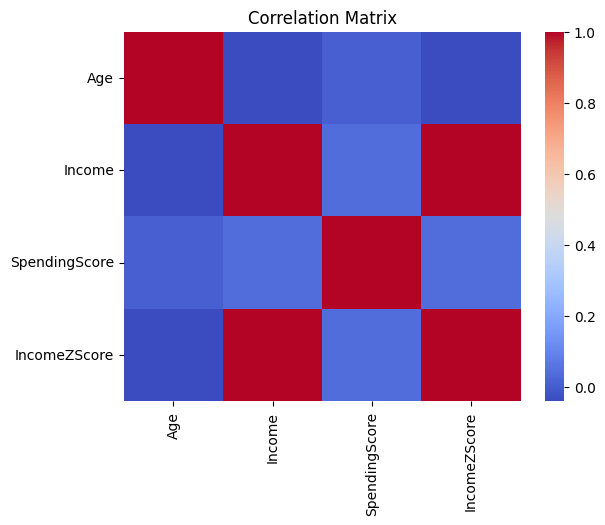

In [42]:
sns.heatmap(corr_matrix, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

## Hypothesis Testing

**Let's test that the mean age is significantly different from 30**

We are checking whether the observed data (mean age) significantly deviates from the specified value (30).

**Null Hypothesis (H<sub>0</sub>):**
The null hypothesis (H<sub>0</sub>) is that the mean age is equal to 30.

**Alternative Hypothesis (H<sub>1</sub>):**
The alternative hypothesis (H<sub>1</sub>) is that the mean age is not equal to 30.

In [43]:
from scipy.stats import ttest_1samp

In [44]:
t_stat, p_value = ttest_1samp(df['Age'], 30)
print(f"t-statistic: {t_stat}, p-value: {p_value}")

t-statistic: 0.6243089585093229, p-value: 0.5325672436623001


### Interpretation of Output:
- t-statistic: 0.624 suggests that the sample mean is 0.624 standard deviations away from the hypothesized mean (30).

- p-value: 0.5326 is higher than the common significance level (e.g., 0.05), indicating that we fail to reject the null hypothesis.


### Conclusion:
There is no statistically significant evidence to suggest that the mean age is different from 30. The sample data does not provide enough evidence to conclude that the mean age is different from 30.